# Introduction to Convolutional Neural Networks (CNNs) and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

It has been modified to only use two classes (pizza and steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> We start with a smaller dataset so we can experiment quickly and figure out what works and what doesn't before scaling up.

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-21 16:03:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   176MB/s    in 0.6s    

2023-07-21 16:03:39 (176 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data
A very crucial step at the beginning of any machine learning project is becoming one with the data. For a computer vision project, this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
! ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/pizza"))

num_steak_images_train

750

> To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

Image shape: (512, 512, 3)


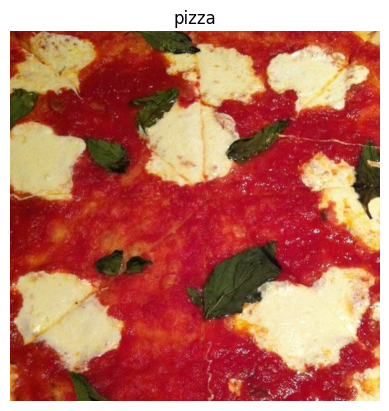

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
# The imported images are arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[136,  48,  38],
        [116,  28,  16],
        [ 87,   1,   0],
        ...,
        [223, 178, 111],
        [216, 183, 112],
        [204, 180, 106]],

       [[122,  34,  22],
        [116,  28,  16],
        [ 98,  12,   0],
        ...,
        [231, 186, 119],
        [223, 190, 119],
        [218, 192, 118]],

       [[114,  27,  10],
        [120,  33,  16],
        [113,  26,   9],
        ...,
        [233, 190, 122],
        [227, 194, 123],
        [230, 202, 129]],

       ...,

       [[200, 150,  55],
        [208, 153,  63],
        [189, 126,  46],
        ...,
        [252, 243, 186],
        [254, 245, 190],
        [249, 240, 185]],

       [[209, 160,  67],
        [213, 159,  71],
        [197, 136,  56],
        ...,
        [252, 242, 189],
        [254, 244, 191],
        [250, 240, 187]],

       [[198, 152,  58],
        [180, 129,  40],
        [178, 117,  37],
        ...,
        [252, 240, 19

In [11]:
# View the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

In [12]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.53333333, 0.18823529, 0.14901961],
        [0.45490196, 0.10980392, 0.0627451 ],
        [0.34117647, 0.00392157, 0.        ],
        ...,
        [0.8745098 , 0.69803922, 0.43529412],
        [0.84705882, 0.71764706, 0.43921569],
        [0.8       , 0.70588235, 0.41568627]],

       [[0.47843137, 0.13333333, 0.08627451],
        [0.45490196, 0.10980392, 0.0627451 ],
        [0.38431373, 0.04705882, 0.        ],
        ...,
        [0.90588235, 0.72941176, 0.46666667],
        [0.8745098 , 0.74509804, 0.46666667],
        [0.85490196, 0.75294118, 0.4627451 ]],

       [[0.44705882, 0.10588235, 0.03921569],
        [0.47058824, 0.12941176, 0.0627451 ],
        [0.44313725, 0.10196078, 0.03529412],
        ...,
        [0.91372549, 0.74509804, 0.47843137],
        [0.89019608, 0.76078431, 0.48235294],
        [0.90196078, 0.79215686, 0.50588235]],

       ...,

       [[0.78431373, 0.58823529, 0.21568627],
        [0.81568627, 0.6       , 0.24705882],
        [0.74117647, 0

## An end-to-end example

A convolutional neural network to find patterns in our images. More specifically, we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called caling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test" # Two methods, both work

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 36s 399ms/step - loss: 0.5984 - accuracy: 0.6747 - val_loss: 0.4514 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4542 - accuracy: 0.7867 - val_loss: 0.4065 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 13s 286ms/step - loss: 0.4338 - accuracy: 0.8007 - val_loss: 0.3401 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 22s 466ms/step - loss: 0.3827 - accuracy: 0.8253 - val_loss: 0.3109 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 12s 250ms/step - loss: 0.3391 - accuracy: 0.8500 - val_loss: 0.3323 - val_accuracy: 0.8660


> Always ensure you are using a GPU or else runtime inefficient.

In [14]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

(a non-CNN model on our image data)

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 223ms/step - loss: 1.2455 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 220ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 236ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 244ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 252ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


> Despite having 20x more parameters than the CNN (model_1), model_2 performs terribly.

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 224ms/step - loss: 3.5205 - accuracy: 0.6120 - val_loss: 0.6431 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 10s 220ms/step - loss: 0.6219 - accuracy: 0.7213 - val_loss: 0.5534 - val_accuracy: 0.7260
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.7390 - accuracy: 0.7073 - val_loss: 0.6116 - val_accuracy: 0.6820
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4615 - accuracy: 0.7973 - val_loss: 0.4949 - val_accuracy: 0.7500
Epoch 5/5
47/47 [==============================] - 13s 268ms/step - loss: 0.4732 - accuracy: 0.8047 - val_loss: 0.5273 - val_accuracy: 0.7420


In [18]:
# Get a summary od model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> model_3 (non-CNN) has nearly 500x as many params as model_1 (CNN), but still performs worse

> You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. In a lot of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other, hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering different **features** in an image.

## Binary Classification: Break down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing and turning our data into batches)
3. Create a model (started with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

Image shape: (342, 512, 3)
Image shape: (384, 512, 3)


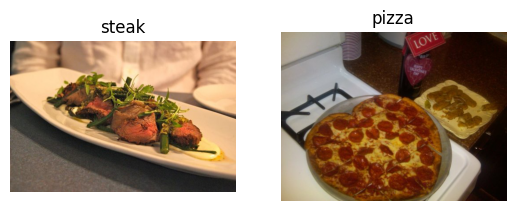

In [19]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [20]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

> Next step is to turn data into **batches**.

> A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

> It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [21]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [24]:
# How many batches are there?
len(train_data), 1500/32

(47, 46.875)

In [25]:
# View the first batch of labels and first image
labels, images[0]

(array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       dtype=float32),
 array([[[0.47058827, 0.40784317, 0.34509805],
         [0.4784314 , 0.427451  , 0.3647059 ],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.8313726 , 0.70980394, 0.48627454],
         [0.8431373 , 0.73333335, 0.5372549 ],
         [0.87843144, 0.7725491 , 0.5882353 ]],
 
        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.5058824 ],
         [0.8431373 , 0.73333335, 0.5372549 ]],
 
        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> In deep learning, there is almost an infinite amount of architechtures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (eg. look at which current model is performing best in the field for your problem).

In [26]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [27]:
# Create the model (this will be our baseline, a 3 layer convolutional neural network)
model_4 = Sequential([

    Conv2D(filters=10,    # filters is the number of sliding windows going across input (higher = more complex model)
           kernel_size=(3, 3),   # the size of the sliding window going across an input
           strides=(1, 1),       # the size of the step the sliding window takes across an input
           padding="valid",      # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)),  # input layer (specify input shape)

    Conv2D(10, 3, activation="relu"),   # same as first layer minus input_shape

    Conv2D(10, 3, activation="relu"),

    Flatten(),

    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)

])

In [28]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [29]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [30]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [31]:
from tensorflow.python.ops.variables import validate_synchronization_aggregation_trainable
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 256ms/step - loss: 0.6040 - accuracy: 0.7100 - val_loss: 0.4452 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 12s 263ms/step - loss: 0.4015 - accuracy: 0.8180 - val_loss: 0.3627 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 13s 273ms/step - loss: 0.2627 - accuracy: 0.9073 - val_loss: 0.3401 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 15s 326ms/step - loss: 0.1215 - accuracy: 0.9660 - val_loss: 0.4033 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 11s 235ms/step - loss: 0.0396 - accuracy: 0.9940 - val_loss: 0.4671 - val_accuracy: 0.8160


In [32]:
# Compare to first CNN
model_1.evaluate(test_data), model_1.summary()

16/16 [==============================] - 3s 159ms/step - loss: 0.3323 - accuracy: 0.8660
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (No

([0.33229488134384155, 0.8659999966621399], None)

### 5. Evaluating our model

<Axes: >

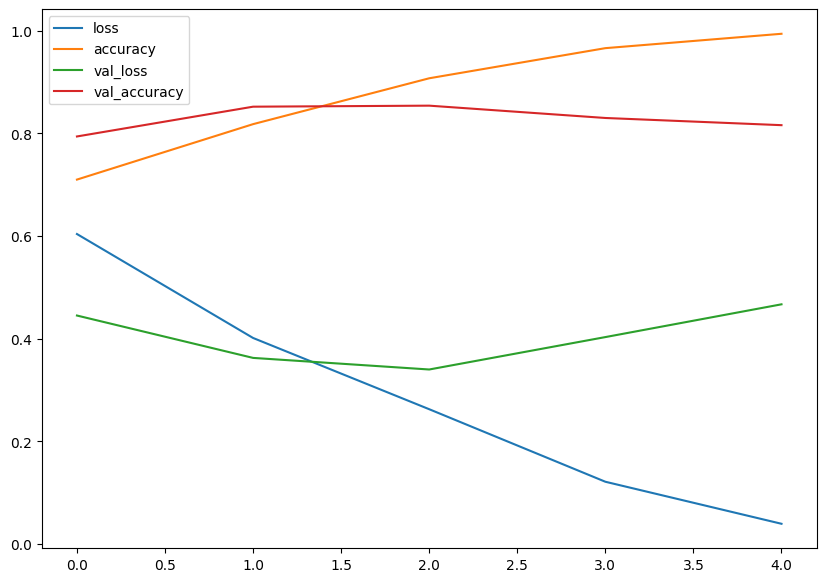

In [33]:
# Plotting the loss/training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [34]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

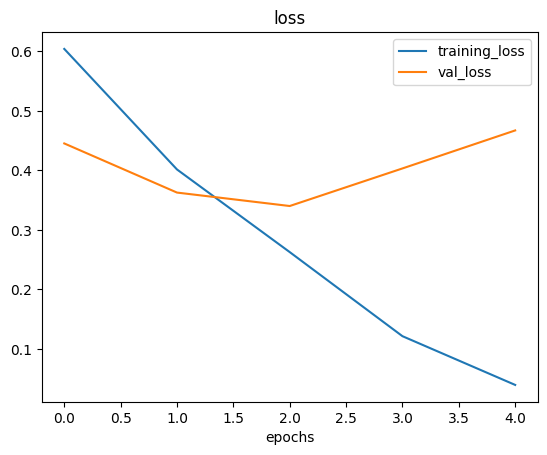

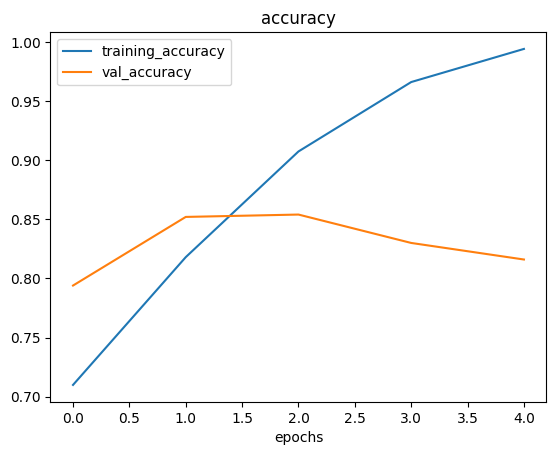

In [35]:
# Check out loss and accuracy of model_4
plot_loss_curves(history_4)

> Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates). When there are large difference your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D
* Add more data...

> Reducing overfitting is also known as **regularization**.

In [36]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [37]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [38]:
# Fit the model
history_5 = model_5.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 237ms/step - loss: 0.6239 - accuracy: 0.6507 - val_loss: 0.4473 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 12s 251ms/step - loss: 0.4332 - accuracy: 0.8047 - val_loss: 0.3501 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 14s 300ms/step - loss: 0.4345 - accuracy: 0.8093 - val_loss: 0.3799 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 12s 256ms/step - loss: 0.3818 - accuracy: 0.8347 - val_loss: 0.3136 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 15s 325ms/step - loss: 0.3597 - accuracy: 0.8420 - val_loss: 0.3125 - val_accuracy: 0.8760


In [39]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [40]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


> Despite having 50x more parameters in model_4, model_5 outperforms it due to power of MaxPool layer

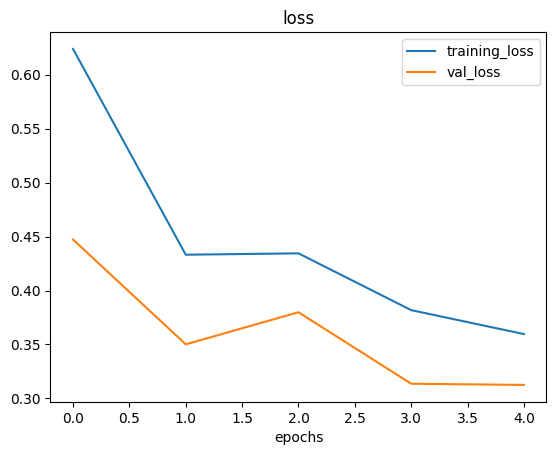

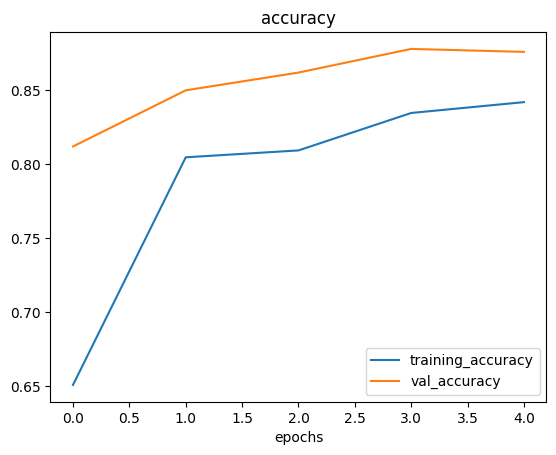

In [41]:
# Plot loss curves
plot_loss_curves(history_5)

### Data Augmentation

In [42]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,   # rotate an image
                                          shear_range=0.2,      # shear an image
                                          zoom_range=0.2,       # zoom in on an image
                                          width_shift_range=0.2,    # move image around on x-axis
                                          height_shift_range=0.3,   # move image around on y-axis
                                          horizontal_flip=True) # flip an image

# Create ImageDataGenerator without data augmentaion
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for thest dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> Data augmentation is the proces of altering our training data, leading it to have more diveristy, and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it, or something similar.

In [43]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224, 224),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters, our images are left as they are in the directories, but are modified as they're loaded into the model.

In [44]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

Showing image number: 26


(-0.5, 223.5, 223.5, -0.5)

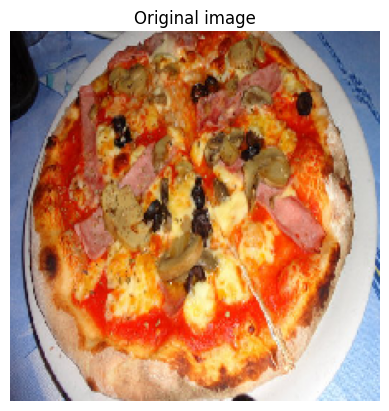

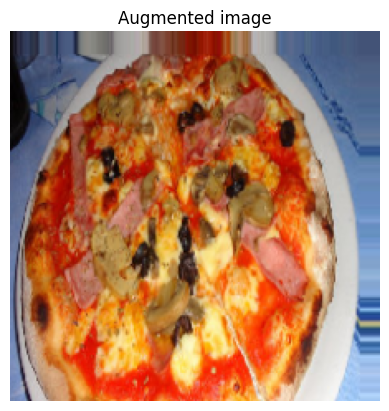

In [45]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [46]:
# Create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 31s 623ms/step - loss: 0.7463 - accuracy: 0.5780 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 29s 626ms/step - loss: 0.6957 - accuracy: 0.4960 - val_loss: 0.6862 - val_accuracy: 0.5640
Epoch 3/5
47/47 [==============================] - 34s 720ms/step - loss: 0.6923 - accuracy: 0.5287 - val_loss: 0.6831 - val_accuracy: 0.6620
Epoch 4/5
47/47 [==============================] - 25s 541ms/step - loss: 0.7021 - accuracy: 0.5660 - val_loss: 0.6837 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 30s 646ms/step - loss: 0.6844 - accuracy: 0.5460 - val_loss: 0.6766 - val_accuracy: 0.6980


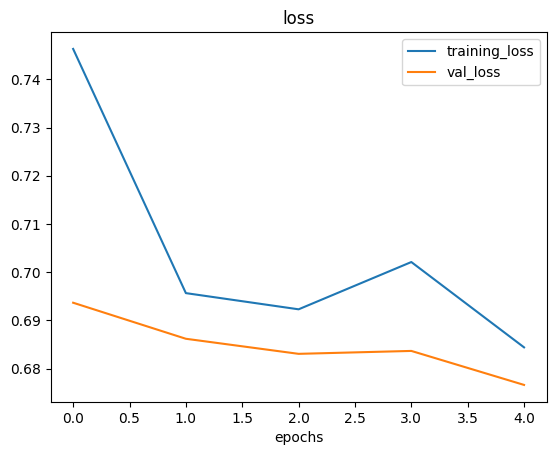

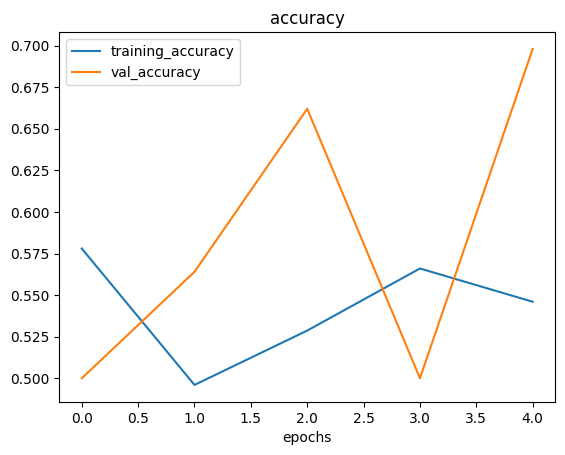

In [47]:
# Check our models training curves
plot_loss_curves(history_6)

> This clearly did not work. This time we will shuffle the augmented training data and train another model to see what happens.

In [48]:
# Import data and augnent it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224, 224),
                                                                         batch_size=32,
                                                                         class_mode="binary",
                                                                         shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [49]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # fitting model_7 on augmented and shuffled training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 32s 634ms/step - loss: 0.6534 - accuracy: 0.5993 - val_loss: 0.5586 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6005 - accuracy: 0.6773 - val_loss: 0.4928 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 26s 545ms/step - loss: 0.5489 - accuracy: 0.7227 - val_loss: 0.3816 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 26s 545ms/step - loss: 0.5149 - accuracy: 0.7493 - val_loss: 0.3692 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 26s 544ms/step - loss: 0.4837 - accuracy: 0.7667 - val_loss: 0.3221 - val_accuracy: 0.8700


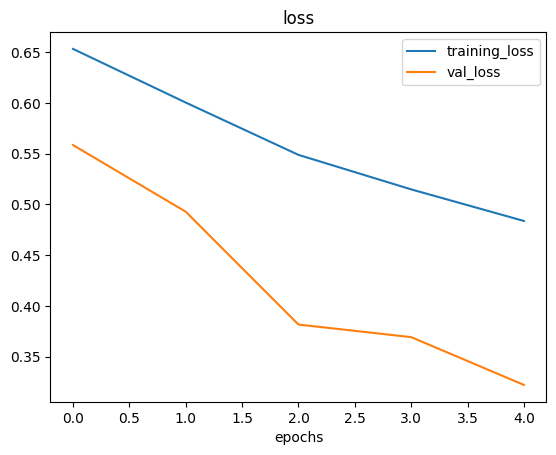

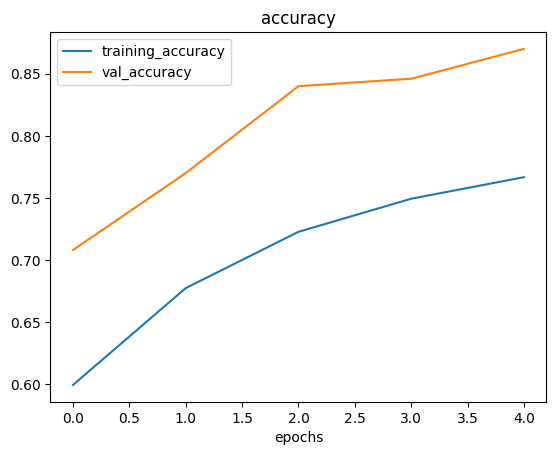

In [50]:
# Plot loss curves
plot_loss_curves(history_7)

> When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn
* Use **transfer learning** to leverage what another model has learned and adjust it for our own use case

## Making a prediction with our trained model on our own custom data

In [51]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-07-21 16:15:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-07-21 16:15:57 (30.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



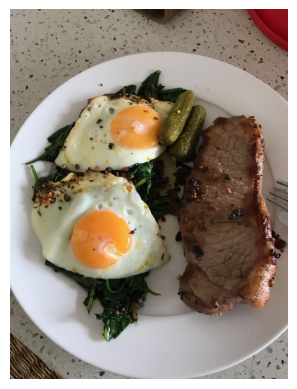

In [52]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [53]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> When you train a neural network and you want to make a prediction on it with your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [54]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to
  (img_shape, img_shape, color_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [55]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [56]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 195ms/step


> The custom image is being put through the model, however, it currently outputs a prediction probability.

In [57]:
# Index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [58]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 21ms/step


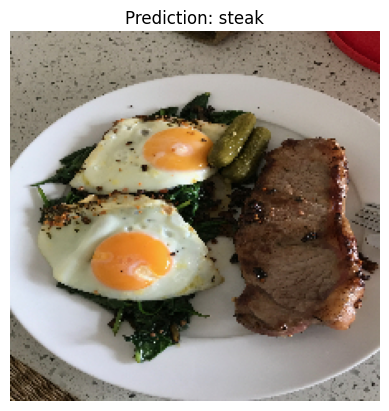

In [59]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

> The model works! Now let's try with an image of pizza

--2023-07-21 16:16:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2023-07-21 16:16:01 (42.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 35ms/step


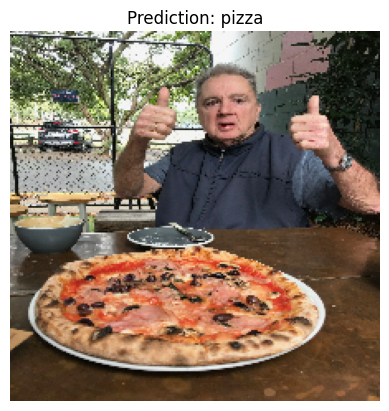

In [60]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

Now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [61]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-21 16:16:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.69.128, 64.233.182.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  33.1MB/s    in 6.2s    

2023-07-21 16:16:08 (80.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [62]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [63]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [64]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

Image shape: (512, 512, 3)


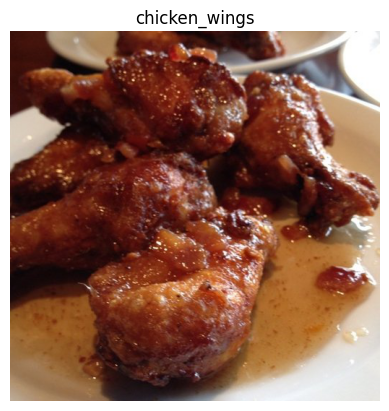

In [65]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)



In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_8.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit a model

In [68]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 65s 268ms/step - loss: 2.1872 - accuracy: 0.2011 - val_loss: 1.9748 - val_accuracy: 0.2996
Epoch 2/5
235/235 [==============================] - 53s 226ms/step - loss: 1.8415 - accuracy: 0.3597 - val_loss: 1.8554 - val_accuracy: 0.3492
Epoch 3/5
235/235 [==============================] - 53s 225ms/step - loss: 1.4577 - accuracy: 0.5099 - val_loss: 1.9706 - val_accuracy: 0.3528
Epoch 4/5
235/235 [==============================] - 53s 225ms/step - loss: 0.8691 - accuracy: 0.7184 - val_loss: 2.6048 - val_accuracy: 0.2848
Epoch 5/5
235/235 [==============================] - 61s 261ms/step - loss: 0.3495 - accuracy: 0.8900 - val_loss: 3.3286 - val_accuracy: 0.2864


### 5. Evaluate the model

In [69]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 14s 176ms/step - loss: 3.3286 - accuracy: 0.2864


[3.328618288040161, 0.2863999903202057]

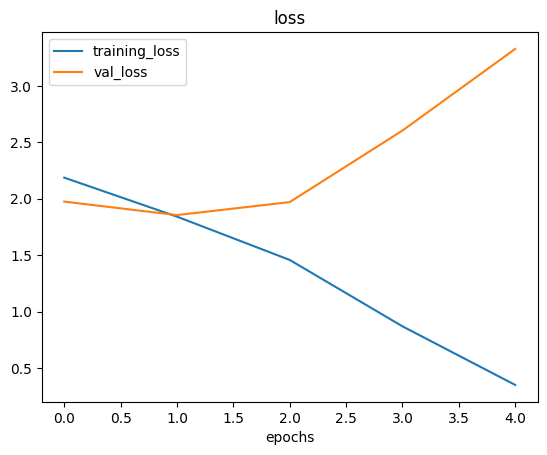

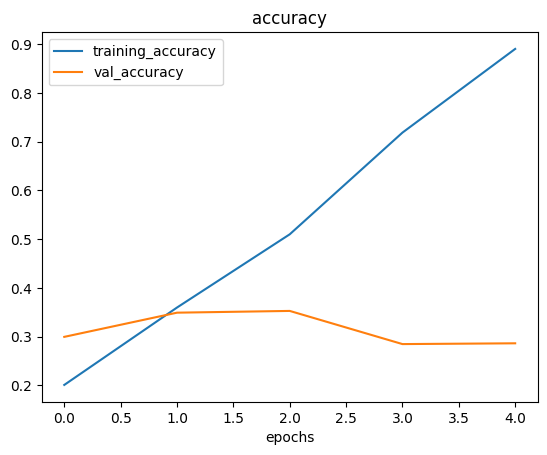

In [70]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

These loss curves tell us the model is **overfitting** the training set quite badly. It is getting great results on the training data but fails to generalize well to unseen data.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear the model is learning something. However, it's not generalizing well to unseen data (overfitting). We can fix this by:

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model. Two ways to simmplify a model is to reduce # of layers, or reduce # of hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - tramsfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [71]:
# Try and simplify the model first (remove 2 Conv layers)
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [74]:
# Fit the model with 2 Conv layers removed
history_9 = model_9.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 236ms/step - loss: 2.1290 - accuracy: 0.2297 - val_loss: 1.9725 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 51s 217ms/step - loss: 1.6419 - accuracy: 0.4507 - val_loss: 1.9399 - val_accuracy: 0.3344
Epoch 3/5
235/235 [==============================] - 52s 220ms/step - loss: 1.0595 - accuracy: 0.6655 - val_loss: 2.1224 - val_accuracy: 0.3228
Epoch 4/5
235/235 [==============================] - 50s 214ms/step - loss: 0.5163 - accuracy: 0.8549 - val_loss: 2.6993 - val_accuracy: 0.3008
Epoch 5/5
235/235 [==============================] - 55s 234ms/step - loss: 0.2172 - accuracy: 0.9539 - val_loss: 3.0924 - val_accuracy: 0.2964


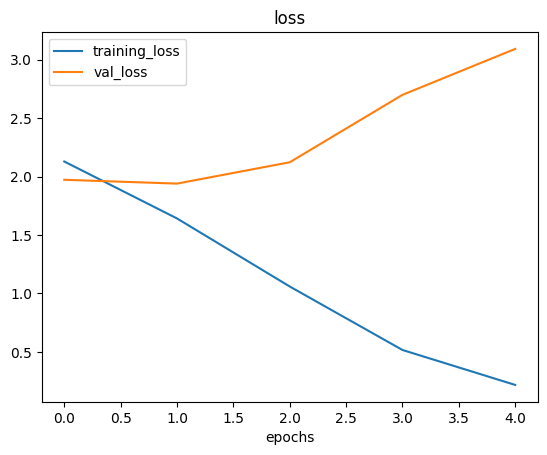

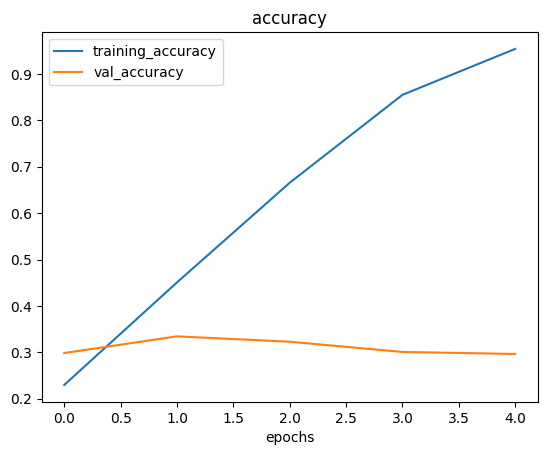

In [75]:
# Check the loss curves
plot_loss_curves(history_9)

In [76]:
model_9.summary(), model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

(None, None)

> Despite removing layers, model_9 has more parameters. Conv layers actually work to reduce the parameters by finding the most important features. Accuracy went down and overfitting got worse.

### Trying to reduce overfitting with data augmentation

In [80]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             height_shift_range=0.2,
                                             width_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [81]:
# Create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the clones model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [82]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                           epochs=5,
                           steps_per_epoch=len(train_data_augmented),
                           validation_data=test_data,
                           validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 150s 630ms/step - loss: 2.1877 - accuracy: 0.1975 - val_loss: 2.0117 - val_accuracy: 0.2732
Epoch 2/5
235/235 [==============================] - 127s 542ms/step - loss: 2.0620 - accuracy: 0.2612 - val_loss: 1.9623 - val_accuracy: 0.3000
Epoch 3/5
235/235 [==============================] - 136s 577ms/step - loss: 2.0480 - accuracy: 0.2739 - val_loss: 1.9296 - val_accuracy: 0.3192
Epoch 4/5
235/235 [==============================] - 127s 542ms/step - loss: 2.0076 - accuracy: 0.2905 - val_loss: 1.8561 - val_accuracy: 0.3428
Epoch 5/5
235/235 [==============================] - 126s 537ms/step - loss: 1.9775 - accuracy: 0.3129 - val_loss: 1.8353 - val_accuracy: 0.3680


In [83]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 3.3286 - accuracy: 0.2864


[3.328618288040161, 0.2863999903202057]

In [85]:
model_10.evaluate(test_data)

79/79 [==============================] - 14s 180ms/step - loss: 1.8353 - accuracy: 0.3680


[1.8352937698364258, 0.36800000071525574]

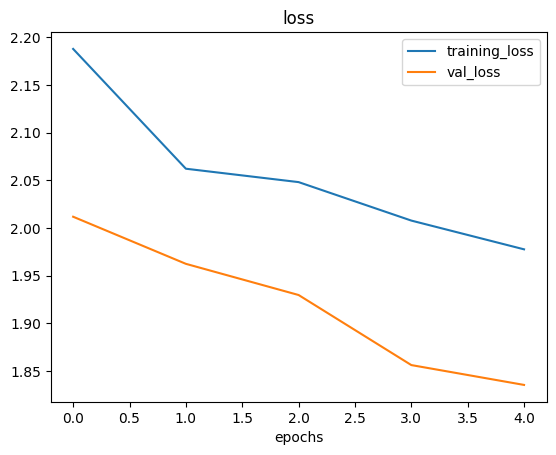

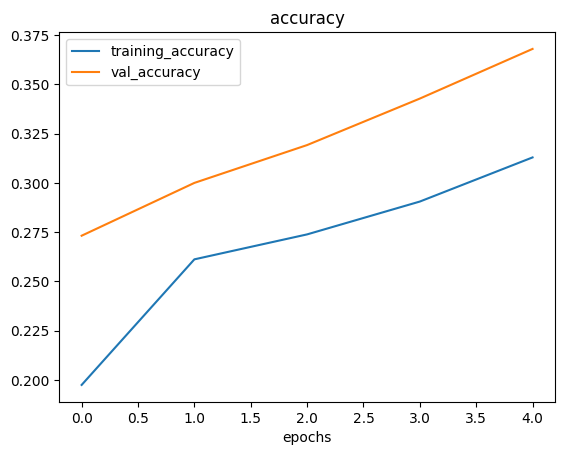

In [86]:
# Check loss curves on model_10
plot_loss_curves(history_10)

> Loss curves look much better after data augmentation. If trained for longer, we may see further improvements.

### 7. Repeat until satisfied

We could keep trying to improve model by:

* restructuring model's architecture (increasing layers/hidden units)
* adjust the learning rate
* try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
* training for longer
* try **transfer learning**

### Making a prediction with our trained model

Using our trained model to make some predictions on custom images

In [87]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [88]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-07-21 17:22:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2023-07-21 17:22:23 (34.3 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2023-07-21 17:22:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awai

In [90]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class and get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 25ms/step


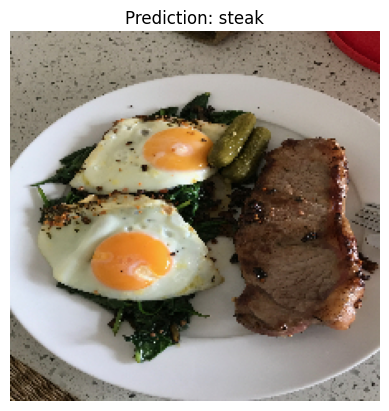

In [97]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

## Saving and loading our model

In [98]:
# Save a model
model_10.save("saved_trained_model_10")

In [101]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 14s 177ms/step - loss: 1.8353 - accuracy: 0.3680


[1.835293173789978, 0.36800000071525574]

In [102]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 14s 173ms/step - loss: 1.8353 - accuracy: 0.3680


[1.8352937698364258, 0.36800000071525574]